In [2]:
import numpy as np
from scipy import interpolate as interp
import matplotlib.pyplot as plt
import scipy.special as sc

def get_psi(t0,t1,k):
    N = 1000
    k0 = t0 + t1
    ####Integrator can go here, Below is the trap rule
    #t = np.linspace(-.5,.5, N+1)
    #z_temp = np.exp(1j*(k0*t + k*t**2/2))
    #z = z_temp[0]/2 + z_temp[N]/2
    #zf = sc.hyp1f1(0.5, 1.5, 1/2)
    #zi = sc.hyp1f1(0.5, 1.5, -1/2)
    #for ii in range(1,N):
    #   z = z + z_temp[ii]
    ####
    z_temp = sc.hyp1f1(0.5, 1.5, 1.j*(1/2)**2/2*k )
    zf = 1/2*z_temp
    zi = -1/2*z_temp
    psi = np.arctan(np.imag(zf - zi)/np.real(zf - zi))
    return(psi)

def get_psi_der(t0,t1,k):
    ### compute the derivaitve for netwons method
    N = 1000
    k0 = t0 + t1
    ####Can up in the function get_psi for efficiency
    t = np.linspace(-.5,.5, N+1)
    z_temp = np.exp(1j*(k0*t + k*t**2/2))
    z = z_temp[0]/2 + z_temp[N]/2
    z_der = 1j/8*(z_temp[0]/2 + z_temp[N]/2)
    for ii in range(1,N):
    #    z_der = z_der + 1j*z_temp[ii]*t[ii]**2/2
        z = z + z_temp[ii]
    ####
    zf = sc.hyp1f1(0.5, 1.5, 1/2)
    zi = sc.hyp1f1(0.5, 1.5, -1/2)
    psi = np.arctan(np.imag(zf - zi)/np.real(zf - zi))
    real_z = np.real(z)
    imag_z = np.imag(z)
    real_dz = np.real(z_der)
    imag_dz = np.imag(z_der)
    psi = np.arctan(np.imag(z)/np.real(z))
    #psi = np.arctan2(np.real(z),np.imag(z))
    F = k - 8*psi + 4*(t0-t1)
    DF = 1 - 8*imag_z**2/(imag_z**2 + real_z**2)*(real_dz*imag_z - imag_dz*real_z)/(imag_z**2)
    return(F,DF)

def fix_point_iter(t0,t1):
    tol = 1.e-14
    err = 1
    count = 0
    #k = 6*(t1-t0)*(1-(t0+t1)/(2*(np.pi)))**3
    #print('Guess from literature', k)
    #k = (12*((-6*t0+6*t1+2*np.sqrt(9*t0**2-18*t0*t1+9*t1**2+128))**(2/3)-8))/(-6*t0+6*t1+2*np.sqrt(9*t0**2-18*t0*t1+9*t1**2+128))**(1/3)
    #print('First order approx guess',k)
    ####Iteration method can go here
    factor = 5.994345785701063
    k = factor*t0 - factor*t1
    while ((err > tol) & (count < 1000)):
        count = count + 1
        psi = get_psi(t0,t1,k)
        k_temp = 8*psi + 4*(t1 - t0)
        err = abs(k_temp - k)
        k = k_temp
    ####
    #print('fixed pt iteration:',k,'     count:', count)
    return k,count

def netwon_method(t0,t1):
    tol = 1.e-12
    err = 1
    count = 0
    k = 6*(t1-t0)*(1-(t0+t1)/(2*(np.pi)))**3
    #k = (12*((-6*t0+6*t1+2*np.sqrt(9*t0**2-18*t0*t1+9*t1**2+128))**(2/3)-8))/(-6*t0+6*t1+2*np.sqrt(9*t0**2-18*t0*t1+9*t1**2+128))**(1/3)
    factor = -5.994345785701063
    #k = factor*t0 - factor*t1
    while ((err > tol) & (count < 100)):
        count = count+1
        [F,DF] = get_psi_der(t0,t1,k)
        k_temp = k - F/DF
        err = abs(k_temp - k)
        k = k_temp
    return k,count


def secant_method(t0,t1):
    #ka = 0
    #kb = 6*(t1-t0)*(1-(t0+t1)/(2*(np.pi)))**3
    factor = -5.994345785701063
    ka = factor*t0 - factor*t1
    kb = -factor*t0 + factor*t1    
    k = kb
    if ka > kb:
        c = kb
        kb = ka
        ka = kb
    
    #f(k) = k - 8*psi - 4*(t1 - t0) = 0 
    err = 10
    tol = 1.e-10
    psi_b = get_psi(t0,t1,kb)
    psi_a = get_psi(t0,t1,ka)
    count = 0
    while ((err > tol) & (count < 100)):
        fa = 8*psi_a + 4*(t1 - t0) - ka
        fb = 8*psi_b + 4*(t1 - t0) - kb
        km = ka - fa*(kb - ka)/(fb -fa)
        psi_m = get_psi(t0,t1,km)
        fm = 8*psi_m + 4*(t1 - t0) - km
        if fa*fm < 0:
            kb = km
            psi_b = psi_m
            fb = fm
        elif fb*fm < 0:
            ka = km
            psi_a = psi_m
            fa = fm
        err = abs(km - k)
        k = km
        count = count + 1
    return km,count

In [3]:
t0 = 1.46131015
t1 = -0.22133227

[k0,count]=fix_point_iter(t0,t1)
print('fixed pt iteration:',k0,count)
[k0,count]=netwon_method(t0,t1)
print('Newtons method:', k0,count)
[k0,count]=secant_method(t0,t1)
print('secant method:', k0,count)

fixed pt iteration: -10.026557732693933 32
Newtons method: -9.767844221229044 26
secant method: -10.026557732693933 4


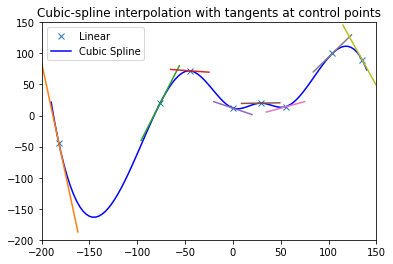

In [34]:
#(-184, 44), (-76, 100), (-45, 121), (0, 120), (29, 112), (55, 14), (104, 100), (135, 120)
#Verify cubic spline initial guess for tangent
testpts = np.zeros([8,2])
#testpts[:,0] = [-184,-76,-45,  0, 29,55,104,135]
#testpts[:,1] = [44  ,100,121,120,112,14,100,120]
testpts[:,0] = [-182,-76,-45,  0, 29,55,104,135]
testpts[:,1] = [-44  ,20,72,12,20,14,100,90]
x = testpts[:,0]
y = testpts[:,1]
slope_test = np.linspace(-1,1,100)

tck = interp.splrep(x, y, s=0)
xnew = np.linspace(-190, 140, 100)
ynew = interp.splev(xnew, tck, der=0)
init_guess = interp.splev(x, tck, der=1)

fig, ax = plt.subplots()
#plt.plot(x, y, 'x', xnew, ynew, x, y, 'b')
ax.plot(x, y, 'x', xnew, ynew, 'b')
for i in range(8):
    slope_test = np.linspace(x[i]-20,x[i]+20,100)
    y_tanline = init_guess[i]*(slope_test-x[i]) + y[i]
    ax.plot( slope_test,y_tanline)
ax.legend(['Linear', 'Cubic Spline'])
ax.set(xlim=(-200, 150), ylim=(-200, 150))
plt.title('Cubic-spline interpolation with tangents at control points')
plt.show()

#yder = interp.splev(xnew, tck, der=1)
#plt.figure()
#plt.plot(xnew, yder,'--',)
#plt.legend(['Cubic Spline'])
#plt.title('Derivative estimation from spline')
#plt.show()
#init_guess = interp.splev(x, tck, der=1)


Finding T_0 and Z_0 to make Z(s) = T_0 z_p(s) +z_0 
Translating and rotating Z_p to fit the points and plotting


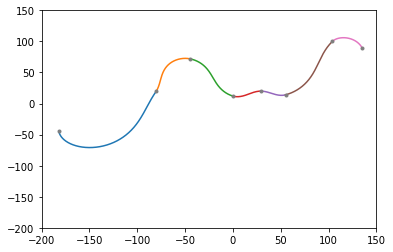

In [40]:
#(-184, 44), (-76, 100), (-45, 121), (0, 120), (29, 112), (55, 14), (104, 100), (135, 120)
N = 8
testpts = np.zeros([N,2])
#testpts[:,0] = [-184,-76,-45,  0, 29,55,104,135]
#testpts[:,1] = [44  ,100,121,120,112,14,100,120]
testpts[:,0] = [-182,-80,-45,  0, 29,55,104,135]
testpts[:,1] = [-44  ,20,72,12,20,14,100,90]
x = testpts[:,0]
y = testpts[:,1]
tck = interp.splrep(x, y, s=0)
init_guess = interp.splev(x, tck, der=1)#this will be the initial guess for the slope of the tangent

#get the tanget angle of the tangent for the clothoid relative to the axis between -pi and pi
tangent_angle_guess = np.arctan(init_guess)
for k in range(N):
    while ((tangent_angle_guess[k] < -np.pi) | (tangent_angle_guess[k] > np.pi)):
        if (tangent_angle_guess[k] < -np.pi):
            tangent_angle_guess[k] = tangent_angle_guess[k] + 2*np.pi
        elif (tangent_angle_guess[k] > np.pi):
            tangent_angle_guess[k] = tangent_angle_guess[k] - 2*np.pi

#get tangent angle of the chord to the x_axis
tangent_angle_chord = np.zeros(N)
tangent_angle_chord[0:N-1] = np.arctan((y[1:N] - y[0:N-1])/(x[1:N] - x[0:N-1]))
#tangent_angle_chord[0:N-1] = np.arctan2((y[1:N] - y[0:N-1]),(x[1:N] - x[0:N-1]))
for k in range(N):
    while ((tangent_angle_chord[k] < -np.pi) | (tangent_angle_chord[k] > np.pi)):
        if (tangent_angle_chord[k] < -np.pi):
            tangent_angle_chord[k] = tangent_angle_chord[k] + 2*np.pi
        elif (tangent_angle_chord[k] > np.pi):
            tangent_angle_chord[k] = tangent_angle_chord[k] - 2*np.pi

tangent_angle = np.zeros([N-1,2])
kappa_0 = np.zeros([N-1,1])
kappa_1 = np.zeros([N-1,1])
counts = np.zeros([N-1,1])

#print(tangent_angle_guess[0:5])
#print(tangent_angle_chord[0:5])
#Find \kappa_1 for each of the segments
#print(np.degrees(tangent_angle_chord))
#print(np.degrees(tangent_angle_guess))
for k in range(N-1):
    #get tangent angle relative to the chord between -pi,pi //// Part to set up between -pi,pi deactivated.
    t0 = -tangent_angle_guess[k] + tangent_angle_chord[k]
    t1 = tangent_angle_guess[k+1] - tangent_angle_chord[k]
    #print(np.degrees(t0))
    #print(np.degrees(t1))
    
#####    
#    while ((t0 < -np.pi) | (t0 > np.pi)):
#        if (t0 < -np.pi):
#            t0 = t0 + 2*np.pi
#        elif (t0 > np.pi):
#            t0 = t0 - 2*np.pi
#    while ((t1 < -np.pi) | (t1 > np.pi)):
#        if (t1 < -np.pi):
#            t1 = t1 + 2*np.pi
#        elif (t1 > np.pi):
#            t1 = t1 - 2*np.pi
#####

    tangent_angle[k,:] = t0,t1    
    kappa_0[k] = t0 + t1
    
#####    
#    while ((kappa_0[k] < -np.pi) | (kappa_0[k] > np.pi)):
#        if (kappa_0[k] < -np.pi):
#            kappa_0[k] = kappa_0[k] + 2*np.pi
#        elif (kappa_0[k] > np.pi):
#            kappa_0[k] = kappa_0[k] - 2*np.pi
#####

    kappa_1[k], counts[k] = fix_point_iter(t0,t1)
    #kappa_1[k], counts[k] = netwon_method(t0,t1) #Other method to find zeros
    #kappa_1[k], counts[k] = secant_method(t0,t1) #Other method to find zeros
    
    
#####
#    while ((kappa_1[k] < -np.pi) | (kappa_1[k] > np.pi)):
#        if (kappa_1[k] < -np.pi):
#            kappa_1[k] = kappa_1[k] + 2*np.pi
#        elif (kappa_1[k] > np.pi):
#            kappa_1[k] = kappa_1[k] - 2*np.pi
#####
            
    


s_i = np.zeros([N-1,1])
s_f = np.zeros([N-1,1])
s_i = kappa_0/kappa_1 - 1/2
s_f = kappa_0/kappa_1 + 1/2
s_mid = kappa_0/kappa_1 # (s_i + s_f)/2 

#unscaled clothoid length
z_s_i = s_i*sc.hyp1f1(0.5, 1.5, 1j*(s_i)**2/2*kappa_1)
z_s_f = s_f*sc.hyp1f1(0.5, 1.5, 1j*(s_f)**2/2*kappa_1)

#get the chord lengths, will be size N-1
chord_length = np.sqrt((x[0:N-1] - x[1:N])**2 + (y[0:N-1] - y[1:N])**2)
clothoid_length = abs(z_s_f - z_s_i)
l_lambda = np.zeros([N-1,1])
alpha = np.zeros([N-1,1])
T_i = np.zeros([N-1,1],dtype=complex)
T_0 = np.zeros([N-1,1],dtype=complex)

for ii in range(N-1):
    l_lambda[ii] = chord_length[ii]/clothoid_length[ii]
    alpha[ii] = kappa_1[ii]/l_lambda[ii]**2
    #T_i[ii] = np.exp(1j*tangent_angle[ii,0])
    #T_0[ii] = T_i[ii]*np.exp(-1j*alpha[ii]*(l_lambda[ii]*s_i[ii])**2/2)
    #T_0[ii] = T_i[ii]*np.exp(-1j*kappa_1[ii]*s_i[ii]**2/2)

#z_i = np.zeros([N-1,1],dtype=complex)
#z_f = np.zeros([N-1,1],dtype=complex)
#z_i = s_i*l_lambda*sc.hyp1f1(0.5, 1.5, 1j*(s_i*l_lambda)**2/2*alpha)
#z_f = s_f*l_lambda*sc.hyp1f1(0.5, 1.5, 1j*(s_f*l_lambda)**2/2*alpha)

#Plotting parameters
vec_len = 1001
t_vec = np.zeros([N,vec_len])

#shift for clothoid
#z_1 = -T_0*s_f*l_lambda*sc.hyp1f1(0.5, 1.5, 1j*(s_f*l_lambda)**2/2*alpha)
#z_0 = -T_0*s_i*l_lambda*sc.hyp1f1(0.5, 1.5, 1j*(s_i*l_lambda)**2/2*alpha)
#z_mid = -T_0*s_mid*l_lambda*sc.hyp1f1(0.5, 1.5, 1j*(s_mid*l_lambda)**2/2*alpha)

#clothoid segement
z_p_vec = np.zeros([N,vec_len],dtype=complex)
clothoid = np.zeros([N,vec_len],dtype=complex)
for ii in range(N-1):
    t_vec[ii,:] = np.reshape(np.linspace(s_i[ii],s_f[ii],vec_len),vec_len);
    z_p_vec[ii,:] = t_vec[ii,:]*l_lambda[ii]*sc.hyp1f1(0.5, 1.5, 1j*(t_vec[ii,:]*l_lambda[ii])**2/2*alpha[ii])
    #clothoid[ii,:] = (T_0[ii]*z_p_vec[ii,:] + z_0[ii]) + testpts[ii,0] +1j*testpts[ii,1]
    

T0 = np.zeros(N,dtype=complex)
Z0 =  np.zeros(N,dtype=complex)
print('Finding T_0 and Z_0 to make Z(s) = T_0 z_p(s) +z_0 ')
for ii in range(0,N-1):
    det = -z_p_vec[ii,-1]+z_p_vec[ii,0]
    T0[ii] = (complex(testpts[ii,0],testpts[ii,1])-complex(testpts[ii+1,0],testpts[ii+1,1]))/det
    Z0[ii] = (-z_p_vec[ii,-1]*complex(testpts[ii,0],testpts[ii,1])+z_p_vec[ii,0]*complex(testpts[ii+1,0],testpts[ii+1,1]))/det

    
print('Translating and rotating Z_p to fit the points and plotting')
fig, ax = plt.subplots()
zvec = np.zeros([N,vec_len],dtype=complex)
for ii in range(0,N-1):
    zvec[ii,:] = T0[ii]*z_p_vec[ii,:] + Z0[ii]
    xc = np.real(zvec[ii,:])
    yc = np.imag(zvec[ii,:])
    ax.plot(xc, yc,'-')
ax.plot(testpts[0:N,0],testpts[0:N,1],'.')   
ax.set(xlim=(-200, 150), ylim=(-200, 150));


#print('Difference between endpoints of clothoid segments vs difference between nodes: ')
#for ii in range(0,N-1):
#    print(abs(z_p_vec[ii,-1]-z_p_vec[ii,0]))
#    print(np.linalg.norm(testpts[ii]-testpts[ii+1]))




In [6]:
print(z_i)
print(testpts)

NameError: name 'z_i' is not defined

In [ ]:
#xy_mid =(testpts[0,0] + 1j*testpts[0,1] + testpts[1,0] + 1j*testpts[1,1])/2
#print(testpts[0:2,:])
#print(l_lambda[0]*T_0[0]*(z_p_vec[0,0] - z_s_mid[0]) + xy_mid)
print(T_0)
print(T_i)
print(tangent_angle)
print(np.exp(1j*tangent_angle))

In [ ]:
#[[1, 0], [2, 0], [0, 2], [0, 1]]
#testpts = np.zeros([4,2])
#testpts[:,0] = [0,0,1,2]
#testpts[:,1] = [2,1,0,0]
#x = testpts[:,0]
#y = testpts[:,1]
#tck = interp.splrep(x, y, s=0)
#init_guess = interp.splev(x, tck, der=1)#this will be the initial guess for the slope of the tangent


In [ ]:
#scanning k_1 over -pi to pi
N = 101
vec = np.linspace(-np.pi,np.pi,N)
t0,t1 = np.meshgrid(vec,vec)
k1_mat = np.zeros([N,N])

for ii in range(N):
    for jj in range(N):
        #k1_mat[ii,jj],count = fix_point_iter(vec[ii],vec[jj])
        k1_mat[ii,jj],count=netwon_method(vec[ii],vec[jj])
            

In [ ]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
plt.contourf(t0,t1,k1_mat)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t0,t1,k1_mat)
plt.show

In [ ]:
p1 = [ t0[30,40], t1[30,40], k1_mat[30,40]]
p2 = [ t0[22,22], t1[22,22], k1_mat[22,22]]
p3 = [ t0[50,40], t1[50,40], k1_mat[50,40]]
print(p1)
print(p2)
print(p3)

In [ ]:
v1 = np.zeros(3)
v2 = np.zeros(3)
for k in range(3):
    v1[k] = p2[k] - p1[k]
    v2[k] = p3[k] - p2[k]
w = np.cross(v1,v2)

In [ ]:
print(v1,v2,w)

In [ ]:
t0[50,50],t1[50,50],k1_mat[50,50]

In [ ]:
factor = 5.994345785701063
t0 = 1.46131015
t1 = -0.22133227
k1 = factor*t0 - factor*t1
print(k1)